In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as soup # HTML parser
import requests # Page requests
import re # Regular expressions
import time # Time delays
import random # Random numbers

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} 
url = 'https://charlottesville.craigslist.org/search/cta?purveyor=owner#search=1~gallery~0~0' 
raw = requests.get(url,headers=header) # Get page


brands = ['honda', 'dodge','toyota','ford','tesla','gmc','jeep','bmw','mitsubishi','mazda',
          'volvo','audi','volkswagen','chevy','chevrolet','acura','kia','subaru','lexus',
          'cadillac','buick','porsche','infiniti']


bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [3]:
data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in brands] # Find brands in the title
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan 
    else: # If hits, record year as first match
        year = regex_search.group(0)
    #
    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand})
    


In [4]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print(df.shape)
df.to_csv('craigslist_cville_cars.csv')
df.head()

(92, 6)


,title,price,year,link,brand,age
0,2005 hyundai elantra,1200,2005.0,https://charlottesville.craigslist.org/cto/d/a...,missing,20.0
1,2007 f250 king ranch,17500,2007.0,https://charlottesville.craigslist.org/cto/d/w...,missing,18.0
2,1997 dodge 2500 4x4 cummins,9500,1997.0,https://charlottesville.craigslist.org/cto/d/l...,dodge,28.0
3,1999 honda civic 4 cyl manual transmission,1000,1999.0,https://charlottesville.craigslist.org/cto/d/c...,honda,26.0
4,"1998 gmc sierra 1500 sl truck auto rwd <103,00...",6250,1998.0,https://charlottesville.craigslist.org/cto/d/l...,gmc,27.0


count       92.000000
mean      8589.706522
std       8170.544206
min       1000.000000
25%       3187.500000
50%       5650.000000
75%      10625.000000
max      38000.000000
Name: price, dtype: float64


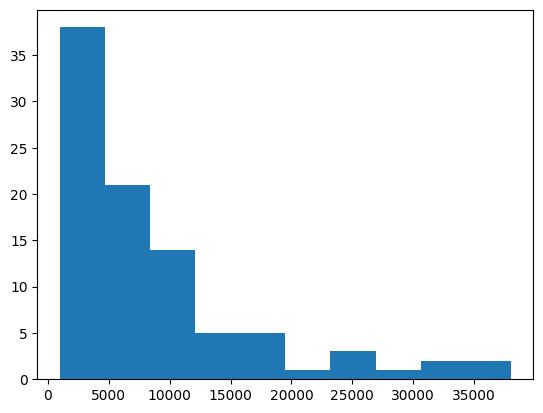

count    78.000000
mean     20.858974
std      13.437420
min       4.000000
25%      12.000000
50%      18.000000
75%      23.750000
max      67.000000
Name: age, dtype: float64


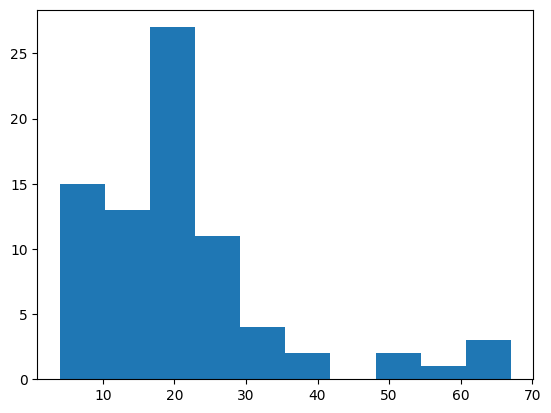

In [5]:
# EDA for price and age:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [6]:
# Price by brand:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                         \
           count          mean           std      min      25%      50%   
brand                                                                     
acura        1.0   3500.000000           NaN   3500.0   3500.0   3500.0   
audi         1.0  11665.000000           NaN  11665.0  11665.0  11665.0   
bmw          5.0   5860.000000   3492.563528   1800.0   3000.0   6000.0   
buick        1.0   4500.000000           NaN   4500.0   4500.0   4500.0   
chevrolet    2.0   5750.000000   1060.660172   5000.0   5375.0   5750.0   
chevy        2.0   4000.000000      0.000000   4000.0   4000.0   4000.0   
dodge        6.0   7500.000000   3224.903099   2000.0   6250.0   8250.0   
ford        10.0   7404.500000   6914.126622   1000.0   1625.0   5375.0   
gmc          4.0   5787.500000   2365.859604   3500.0   4250.0   5375.0   
honda        9.0   6011.000000   4392.253294   1000.0   2899.0   5300.0   
jeep         6.0   8465.833333   7193.233221   1500.0   2975.0   6997.5   
kia          2.0   6500.000000   4242.640687   3500.0   5000.0   6500.0   
missing     25.0  10821.960000  10061.365971   1200.0   3000.0   6500.0   
mitsubishi   1.0   3500.000000           NaN   3500.0   3500.0   3500.0   
subaru       4.0   8925.000000   9810.326192   2500.0   3550.0   4850.0   
tesla        2.0  21450.000000   6434.671709  16900.0  19175.0  21450.0   
toyota       7.0  14107.142857  14253.433170   3300.0   4100.0   7500.0   
volkswagen   2.0   3100.000000   2616.295090   1250.0   2175.0   3100.0   
volvo        2.0   2050.000000     70.710678   2000.0   2025.0   2050.0   

                               
                 75%      max  
brand                          
acura        3500.00   3500.0  
audi        11665.00  11665.0  
bmw          8500.00  10000.0  
buick        4500.00   4500.0  
chevrolet    6125.00   6500.0  
chevy        4000.00   4000.0  
dodge        9875.00  10500.0  
ford        10700.00  18995.0  
gmc          6912.50   8900.0  
honda        8700.00  13000.0  
jeep        11998.75  20000.0  
kia          8000.00   9500.0  
missing     15000.00  35000.0  
mitsubishi   3500.00   3500.0  
subaru      10225.00  23500.0  
tesla       23725.00  26000.0  
toyota      20875.00  38000.0  
volkswagen   4025.00   4950.0  
volvo        2075.00   2100.0

In [7]:
# Age by brand:
df.loc[:,['age','brand']].groupby('brand').describe()

age                                                      
           count       mean        std   min    25%   50%    75%   max
brand                                                                 
acura        1.0  17.000000        NaN  17.0  17.00  17.0  17.00  17.0
audi         0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
bmw          3.0  14.333333   3.511885  11.0  12.50  14.0  16.00  18.0
buick        0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
chevrolet    2.0  32.500000   4.949747  29.0  30.75  32.5  34.25  36.0
chevy        2.0  27.000000   5.656854  23.0  25.00  27.0  29.00  31.0
dodge        3.0  33.333333  15.695010  21.0  24.50  28.0  39.50  51.0
ford         9.0  23.444444  18.554724   8.0  13.00  18.0  20.00  67.0
gmc          4.0  19.500000   7.325754  10.0  16.00  20.5  24.00  27.0
honda        9.0  19.111111   7.406829  11.0  12.00  19.0  22.00  33.0
jeep         5.0  29.000000  20.211383   9.0  22.00  24.0  27.00  63.0
kia          2.0  12.500000   4.949747   9.0  10.75  12.5  14.25  16.0
missing     21.0  21.666667  16.344214   6.0  12.00  18.0  24.00  62.0
mitsubishi   1.0  19.000000        NaN  19.0  19.00  19.0  19.00  19.0
subaru       4.0  15.000000   5.354126   7.0  14.50  17.5  18.00  18.0
tesla        2.0   8.000000   1.414214   7.0   7.50   8.0   8.50   9.0
toyota       6.0  12.500000   7.395945   4.0   7.00  12.0  17.75  22.0
volkswagen   2.0  19.000000   5.656854  15.0  17.00  19.0  21.00  23.0
volvo        2.0  27.000000   8.485281  21.0  24.00  27.0  30.00  33.0

In [8]:
df.loc[ df['brand']=='audi',:]

,title,price,year,link,brand,age
55,audi allroad,11665,NaN,https://charlottesville.craigslist.org/cto/d/c...,audi,NaN


<Axes: xlabel='age', ylabel='price'>

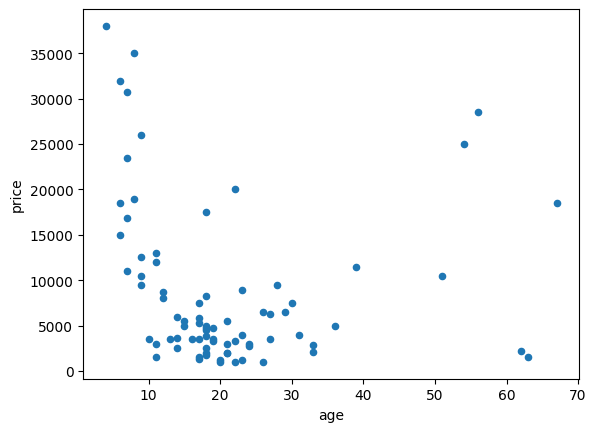

In [9]:
df.plot.scatter('age','price')

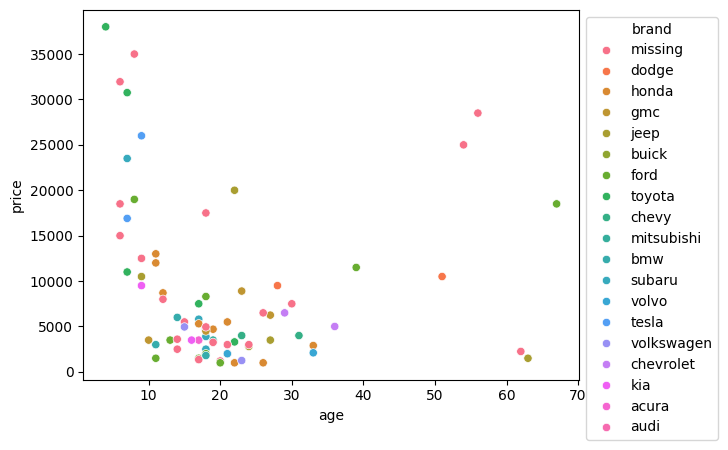

In [10]:
ax = sns.scatterplot(data=df, x='age', y='price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

           log_price   log_age
log_price   0.813266 -0.203894
log_age    -0.203894  0.351473
           log_price   log_age
log_price   1.000000 -0.360961
log_age    -0.360961  1.000000


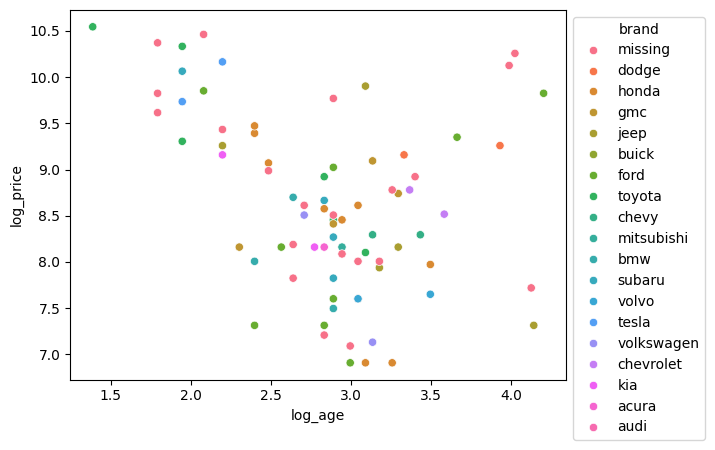

In [11]:
df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

ax = sns.scatterplot(data=df, x='log_age', y='log_price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

print(df.loc[:,['log_price','log_age']].cov())
print(df.loc[:,['log_price','log_age']].corr())

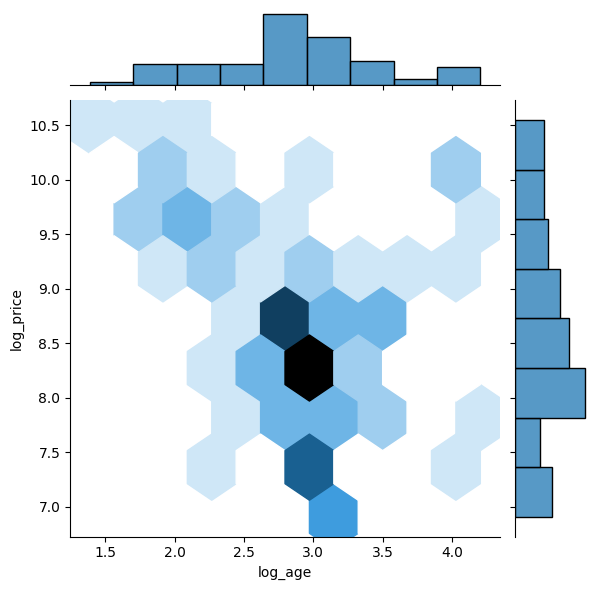

In [12]:
sns.jointplot(data=df, x='log_age', y='log_price',kind='hex')

In [13]:
df.head()

,title,price,year,link,brand,age,log_price,log_age
0,2005 hyundai elantra,1200,2005.0,https://charlottesville.craigslist.org/cto/d/a...,missing,20.0,7.090077,2.995732
1,2007 f250 king ranch,17500,2007.0,https://charlottesville.craigslist.org/cto/d/w...,missing,18.0,9.769956,2.890372
2,1997 dodge 2500 4x4 cummins,9500,1997.0,https://charlottesville.craigslist.org/cto/d/l...,dodge,28.0,9.159047,3.332205
3,1999 honda civic 4 cyl manual transmission,1000,1999.0,https://charlottesville.craigslist.org/cto/d/c...,honda,26.0,6.907755,3.258097
4,"1998 gmc sierra 1500 sl truck auto rwd <103,00...",6250,1998.0,https://charlottesville.craigslist.org/cto/d/l...,gmc,27.0,8.740337,3.295837


In [14]:
links = df['link']
data = []
for link in links: # about 3 minutes
    time.sleep(random.randint(1, 3))
    raw = requests.get(link,headers=header) # Get page
    bsObj = soup(raw.content,'html.parser') # Parse the html
    #
    try:
        year_post = bsObj.find(class_='attr important').find(class_ = 'valu year').get_text()
    except:
        year_post = np.nan
    #
    try:
        condition = bsObj.find(class_='attr condition').find(href=True).get_text()
    except:
        condition = 'missing'
    #
    try:
        cylinders = bsObj.find(class_='attr auto_cylinders').find(class_ = 'valu').get_text()
        cylinders = cylinders.replace('\n','')
    except:
        cylinders = 'missing'
    #
    try:
        drivetrain = bsObj.find(class_='attr auto_drivetrain').find(href=True).get_text()
    except:
        drivetrain = 'missing'
    #
    try:
        fuel = bsObj.find(class_='attr auto_fuel_type').find(href = True).get_text()
    except:
        fuel = 'missing'
    #
    try:
        miles = bsObj.find(class_='attr auto_miles').find(class_ = 'valu').get_text()
    except:
        miles = np.nan
    #
    try:
        color = bsObj.find(class_='attr auto_paint').find(href=True).get_text()
    except:
        color='missing'
    #
    try:
        title = bsObj.find(class_='attr auto_title_status').find(href=True).get_text()
    except:
        title='missing'
    #
    try:
        transmission = bsObj.find(class_='attr auto_transmission').find(href=True).get_text()
    except:
        transmission = 'missing'
    #
    try:
        bodytype = bsObj.find(class_='attr auto_bodytype').find(href=True).get_text()
    except:
        bodytype = 'missing'
    text = bsObj.find(id='postingbody').get_text()
    text = text.replace('\n','')
    text = text.replace('QR Code Link to This Post','')
    record = {'title':title,
              'year_post':year_post,
              'condition':condition,
              'cylinders':cylinders,
              'drivetrain':drivetrain,
              'fuel':fuel,
              'miles':miles,
              'color':color,
              'title':'title',
              'transmission':transmission,
              'bodytype':bodytype,
              'text':text,}
    data.append(record)

In [15]:
new_df = pd.DataFrame.from_dict(data)
new_df.head()

,title,year_post,condition,cylinders,drivetrain,fuel,miles,color,transmission,bodytype,text
0,title,2005,fair,4 cylinders,fwd,gas,"232,450",silver,manual,sedan,‘05 Elantra runs good but did not pass inspect...
1,title,2007,good,8 cylinders,4wd,diesel,"148,086",missing,automatic,pickup,"6.0 diesel, bulletproofed, just replaced trans..."
2,title,1997,fair,6 cylinders,4wd,diesel,"179,000",red,automatic,truck,1997 Dodge 4x4 Cummins. Adult owned and driven...
3,title,1999,salvage,4 cylinders,rwd,gas,"195,338",silver,manual,sedan,"Vehicle does start and run, it has a manual tr..."
4,title,1998,good,8 cylinders,rwd,gas,"102,483",missing,automatic,truck,"1998 GMC Sierra 1500 SL Truck, Auto 2WD/RWD, V..."


In [16]:
new_df.shape

(92, 11)

In [17]:
df = pd.concat([df,new_df],axis=1) # combine data frames
df.head()

,title,price,year,link,brand,age,log_price,log_age,title,year_post,condition,cylinders,drivetrain,fuel,miles,color,transmission,bodytype,text
0,2005 hyundai elantra,1200,2005.0,https://charlottesville.craigslist.org/cto/d/a...,missing,20.0,7.090077,2.995732,title,2005,fair,4 cylinders,fwd,gas,"232,450",silver,manual,sedan,‘05 Elantra runs good but did not pass inspect...
1,2007 f250 king ranch,17500,2007.0,https://charlottesville.craigslist.org/cto/d/w...,missing,18.0,9.769956,2.890372,title,2007,good,8 cylinders,4wd,diesel,"148,086",missing,automatic,pickup,"6.0 diesel, bulletproofed, just replaced trans..."
2,1997 dodge 2500 4x4 cummins,9500,1997.0,https://charlottesville.craigslist.org/cto/d/l...,dodge,28.0,9.159047,3.332205,title,1997,fair,6 cylinders,4wd,diesel,"179,000",red,automatic,truck,1997 Dodge 4x4 Cummins. Adult owned and driven...
3,1999 honda civic 4 cyl manual transmission,1000,1999.0,https://charlottesville.craigslist.org/cto/d/c...,honda,26.0,6.907755,3.258097,title,1999,salvage,4 cylinders,rwd,gas,"195,338",silver,manual,sedan,"Vehicle does start and run, it has a manual tr..."
4,"1998 gmc sierra 1500 sl truck auto rwd <103,00...",6250,1998.0,https://charlottesville.craigslist.org/cto/d/l...,gmc,27.0,8.740337,3.295837,title,1998,good,8 cylinders,rwd,gas,"102,483",missing,automatic,truck,"1998 GMC Sierra 1500 SL Truck, Auto 2WD/RWD, V..."


In [18]:
df.dtypes

title            object
price             int64
year            float64
link             object
brand            object
age             float64
log_price       float64
log_age         float64
title            object
year_post        object
condition        object
cylinders        object
drivetrain       object
fuel             object
miles            object
color            object
transmission     object
bodytype         object
text             object
dtype: object

In [19]:
df['miles'] = df['miles'].str.replace(',','')
df['miles'] = pd.to_numeric(df['miles'],errors='coerce')

df['year_post'] = df['year_post'].str.replace(',','')
df['year_post'] = pd.to_numeric(df['year_post'],errors='coerce')
df.to_csv('craiglist_cville_cars_long.csv')

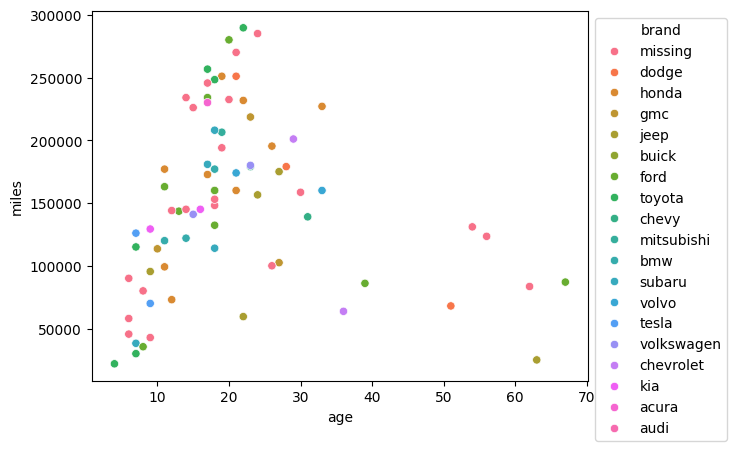

In [20]:
ax = sns.scatterplot(data=df, x='age', y='miles',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))